# Single Protein (KDPG) Simulation

Here we prepare trimer protein KDPG Aldolase for simulation with 2 different versions of our model the ACT model (CPU) and the CUDA DNACT model (GPU)

### Please See Setup Notebook if you are experiencing dependency issues when executing the below command

In [1]:
import models as m #Import our library, if this fails, see above
import os

## Prep PDB File

### The PDB file used in this tutorial has already been modified to include just one copy of KDPG Aldolase. In Chimera we removed the second copy of the Protein. This was necessary as our scripts convert every CA atom in the provided PDB file including from repeated models. 

In [2]:
#Our Scripts have 5 Models each defined by its own class titled:
    #ANM
    #ANMT
    #peptide
    #HANM
    #mANM
    
# Generating Sim files uses a single function called export_to_simulation which will be shown below
    
# This Tutorial we will be using both the ANM model and ANMT model today

#Set Working Directory
wdir = os.getcwd()

INFO: Don't worry about Discontinuous chain warnings!
('kdpg', 0, 'A', (' ', 2, ' '))
('kdpg', 0, 'A', (' ', 3, ' '))
('kdpg', 0, 'A', (' ', 4, ' '))
('kdpg', 0, 'A', (' ', 5, ' '))
('kdpg', 0, 'A', (' ', 6, ' '))
('kdpg', 0, 'A', (' ', 7, ' '))
('kdpg', 0, 'A', (' ', 8, ' '))
('kdpg', 0, 'A', (' ', 9, ' '))
('kdpg', 0, 'A', (' ', 10, ' '))
('kdpg', 0, 'A', (' ', 11, ' '))
('kdpg', 0, 'A', (' ', 12, ' '))
('kdpg', 0, 'A', (' ', 13, ' '))
('kdpg', 0, 'A', (' ', 14, ' '))
('kdpg', 0, 'A', (' ', 15, ' '))
('kdpg', 0, 'A', (' ', 16, ' '))
('kdpg', 0, 'A', (' ', 17, ' '))
('kdpg', 0, 'A', (' ', 18, ' '))
('kdpg', 0, 'A', (' ', 19, ' '))
('kdpg', 0, 'A', (' ', 20, ' '))
('kdpg', 0, 'A', (' ', 21, ' '))
('kdpg', 0, 'A', (' ', 22, ' '))
('kdpg', 0, 'A', (' ', 23, ' '))
('kdpg', 0, 'A', (' ', 24, ' '))
('kdpg', 0, 'A', (' ', 25, ' '))
('kdpg', 0, 'A', (' ', 26, ' '))
('kdpg', 0, 'A', (' ', 27, ' '))
('kdpg', 0, 'A', (' ', 28, ' '))
('kdpg', 0, 'A', (' ', 29, ' '))
('kdpg', 0, 'A', (' ', 30, ' '

/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5438.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5448.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5458.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5468.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5542.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:8

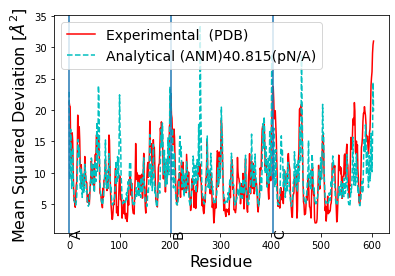

In [3]:
#ANM
# returns coordinates and b-factors of every CA in pdb file
coord, bfact, bmap = m.get_pdb_info(wdir + '/examples/KDPG/kdpg.pdb', returntype='cbm')

# Initalize Model, T-> Temp in Kelvin that crystal was resolved at, cutoff-> r_max in Angstroms
anm = m.ANM(coord, bfact, T=300, cutoff=13)

# One shot Calculation of Analytical B-factors based of coordinates and cutoff value
anm.calc_ANM_unitary(cuda=False) # Only recommend enabling CUDA if (N > 1000)

# Compare Analytical to Experimental B-factors
anm.anm_compare_bfactors_jupyter(bmap=bmap)

In [4]:
# Pretty Good Fit to the Experimental B-factors, Lets export this network to simulation
m.export_to_simulation(anm, wdir + '/examples/KDPG/kdpg.pdb')

/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5438.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5448.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5458.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5468.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5542.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:8

N =  605
Wrote Par File to /home/jonah/PycharmProjects/ENM_Protein/generated.par
Wrote Configuration (dat) File to /home/jonah/PycharmProjects/ENM_Protein/generated.dat
Wrote Topology File to /home/jonah/PycharmProjects/ENM_Protein/generated.top


In [4]:
# Moving Files From working Directory to Ex. Directory
!mv ./generated.par ./examples/KDPG/kdpg.par
!mv ./generated.top ./examples/KDPG/kdpg.top
!mv ./generated.dat ./examples/KDPG/kdpg.dat


# Dragging and dropping kdpg.dat and kdpg.top from a file browser 
# to oxView allows the visualization of the initial configuration


![KDPG Initial Configuration](./examples/imgs/kdpg_iconf.png)

In [4]:
# Run Simulation Using Provided Input File

# First change working directory to home of our simulation files
os.chdir(wdir+'/examples/KDPG/')

# Now let's run a simulation!

# ANM-oxDNA executable path '/home/jonah/CLionProjects/oxdna/oxDNA/build/bin/oxDNA'
!/home/jonah/CLionProjects/oxdna/oxDNA/build/bin/oxDNA input_anm

           0         0.0000   0.000521   0.154005   0.154526 
        1000         2.0000   0.078845   0.086883   0.165728 
        2000         4.0000   0.088781   0.091912   0.180693 
        3000         6.0000   0.098413   0.097580   0.195993 
        4000         8.0000   0.108194   0.097540   0.205734 
        5000        10.0000   0.111006   0.101211   0.212217 
        6000        12.0000   0.110867   0.109755   0.220622 
        7000        14.0000   0.108477   0.111032   0.219509 
        8000        16.0000   0.116303   0.111802   0.228105 
        9000        18.0000   0.120763   0.113918   0.234681 
       10000        20.0000   0.114961   0.119609   0.234571 


## Above you see the energy output from an oxDNA MD simulation, from left to right column it goes

    1.MD_step_number 2.Simulation_time_step 3.Potential_Energy 4.Kinetic_Energy 5.Total_Energy

## To view the trajectory, navigate to /examples/KDPG/ directory

    Drag and drop kdpg.top and the trajectory.dat file intto the oxDNA viewer 
    
## Click Anywhere in the whitespace and use the arrow keys to go cycle through configurations saved during the simulation

### oxView (https://github.com/sulcgroup/oxdna-viewer/)

## Well Done! Let's try it again this time using the ANMT Model!

In [6]:
# AMNT B-factors cannot yet be calculated analytically so we still use the ANM as our base

# There are two main differences. 1. in the input file we define kb kt (in sim units) and Interaction type = ACT
#                                 2. additional angle parameters in the parameter file

# returns coordinates separated by chain, and b-factors separated by chain
coord, bfact = m.get_pdb_info(wdir + '/examples/KDPG/kdpg.pdb')

# To get the additional angle parameters we need to do the following
anmt = m.ANMT(coord, bfact, T=300, cutoff=13)

# One shot Calculation of Analytical B-factors based of coordinates and cutoff value (No knowledge of B&T)
anmt.calc_ANM_unitary(cuda=False)

# Export Simulation Files
m.export_to_simulation(anmt, wdir + '/examples/KDPG/kdpg.pdb', upstreamdir = 'examples/KDPG/')

INFO: Don't worry aobut Discontinuous chain warnings!
INFO: N = 605


/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5438.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5448.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5458.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5468.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5542.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:8

N =  605
Wrote Par File to /home/jonah/PycharmProjects/ENM_Protein/examples/KDPG//generated.par
Wrote Configuration (dat) File to /home/jonah/PycharmProjects/ENM_Protein/examples/KDPG//generated.dat
Wrote Topology File to /home/jonah/PycharmProjects/ENM_Protein/examples/KDPG//generated.top


#### Wait those are the exact same as last time! Yes that's correct the anmt model can not be analytically predicted at this time

#### What we will do, is input the strengths of our kb and kt values in the Input file

In [7]:
# First change working directory to home of our simulation files
os.chdir(wdir+'/examples/KDPG/')

# Change Filenames to what has been prefilled in input_act
!mv ./generated.par ./kdpgt.par
!mv ./generated.top ./kdpgt.top
!mv ./generated.dat ./kdpgt.dat

In [9]:
# ANM-oxDNA executable path '/home/jonah/CLionProjects/oxdna/oxDNA/build/bin/oxDNA'
!/home/jonah/CLionProjects/oxdna/oxDNA/build/bin/oxDNA ./input_act

           0         0.0000   2.497650   0.299190   2.796840 
        1000         2.0000   1.356328   1.351891   2.708220 
        2000         4.0000   1.278527   1.314957   2.593484 
        3000         6.0000   1.217219   1.229959   2.447178 
        4000         8.0000   1.145690   1.176470   2.322160 
        5000        10.0000   1.131105   1.089935   2.221040 
        6000        12.0000   1.049217   1.093380   2.142597 
        7000        14.0000   1.039248   1.004066   2.043315 
        8000        16.0000   0.969054   0.982878   1.951932 
        9000        18.0000   0.932262   0.931052   1.863314 
       10000        20.0000   0.902984   0.885625   1.788609 


In [8]:
print(os.getcwd())

/home/jonah/PycharmProjects/ENM_Protein/examples/KDPG


INFO: Don't worry about Discontinuous chain warnings!
INFO: N = 605
INFO: Don't worry about Discontinuous chain warnings!


/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5438.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5448.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5458.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5468.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5542.
  warnings.warn(
/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:8

INFO: N = 605


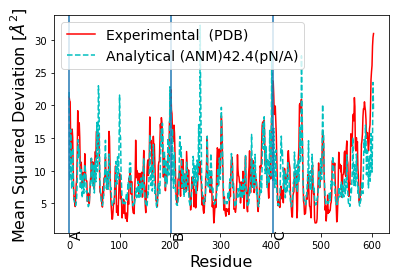

In [4]:
#DELETE THIS CELL
# returns coordinates and b-factors of every CA in pdb file
coord, bfact = m.get_pdb_info(wdir + '/examples/KDPG/kdpg.pdb')
bmap = m.get_pdb_info(wdir + '/examples/KDPG/kdpg.pdb', returntype='bmap')

# Initalize Model, T-> Temp in Kelvin that crystal was resolved at, cutoff-> r_max in Angstroms
anm = m.ANM(coord, bfact, T=300, cutoff=13)

# One shot Calculation of Analytical B-factors based of coordinates and cutoff value
anm.calc_ANM_unitary(cuda=False) # Only recommend enabling CUDA if (N > 1000)

anm.anm_compare_bfactors_jupyter(bmap=bmap)
# Compare Analytical to Experimental B-factors
#anm.ANM_fit_to_exp_linear()